In [1]:
import pandas as pd
import numpy as np

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

def get_metric_values(df, input_type, metric_name):
    if input_type not in df["input_type"].unique():
        raise ValueError(f"'{input_type}' is not a valid input_type. "
                         f"Available: {df['input_type'].unique().tolist()}")
    if metric_name not in df["metric_name"].unique():
        raise ValueError(f"'{metric_name}' is not a valid metric_name. "
                         f"Available: {df['metric_name'].unique().tolist()}")
    
    metric_values = df[(df["input_type"] == input_type) &
                       (df["metric_name"] == metric_name)]["value"]
    return metric_values.values

def read_metrics(experiment_key: str) -> [pd.DataFrame, int]:
    experiment_metrics = pd.read_csv(f"loggs/{experiment_key}/metrics.csv")
    num_loged_epochs = experiment_metrics["epoch"].max() + 1
    return experiment_metrics, num_loged_epochs

def get_model_norm(results):
    return results[results["metric_name"] == "weights_l2"] \
        .groupby("epoch")["value"] \
        .apply(lambda x: np.sqrt((x**2).sum())).values

## Figure 1

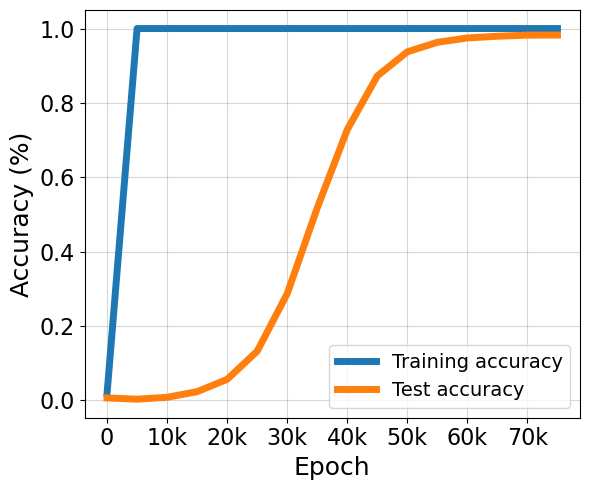

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

experiment_key = "add_mod|num_epochs-80000|train_fraction-0.4|loss_function-stablemax|log_frequency-5000|lr-0.01|batch_size-5107|beta2-0.999"

experiment_metrics, num_logged_epochs = read_metrics(experiment_key)

log_frequency = 5000
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)

train_accuracy = get_metric_values(experiment_metrics, "train", "accuracy")
test_accuracy = get_metric_values(experiment_metrics, "test", "accuracy")

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(epochs, train_accuracy, linewidth=5, label='Training accuracy')
ax.plot(epochs, test_accuracy, linewidth=5, label='Test accuracy')

ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Accuracy (%)', fontsize=18)

ax.grid(alpha=0.5)
ax.legend(fontsize=14, loc="lower right")

ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_xticks(epochs[::2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

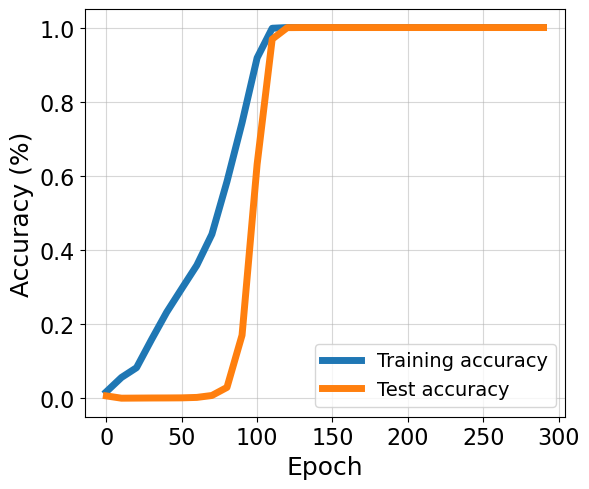

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

experiment_key = "add_mod|num_epochs-300|train_fraction-0.4|log_frequency-10|lr-0.01|batch_size-5107|orthogonal_gradients-True"
experiment_metrics, num_logged_epochs = read_metrics(experiment_key)

train_accuracy = get_metric_values(experiment_metrics, "train", "accuracy")
test_accuracy = get_metric_values(experiment_metrics, "test", "accuracy")

fig, ax = plt.subplots(figsize=(6, 5))

log_frequency = 10
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


ax.plot(epochs, train_accuracy, linewidth=5, label='Training accuracy')
ax.plot(epochs, test_accuracy, linewidth=5, label='Test accuracy')

ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Accuracy (%)', fontsize=18)

ax.grid(alpha=0.5)
ax.legend(fontsize=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

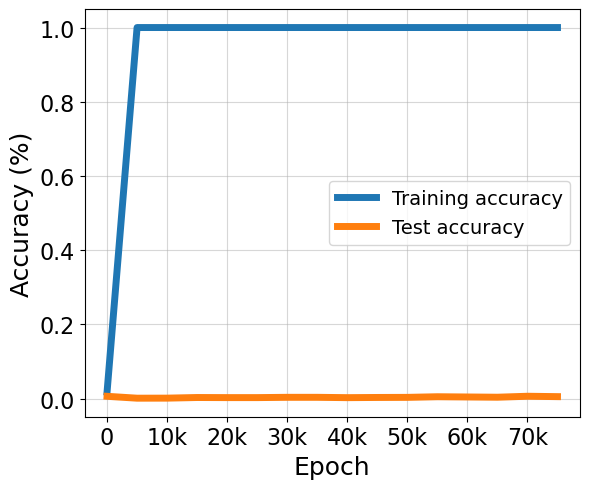

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

experiment_key = "add_mod|num_epochs-80000|train_fraction-0.4|log_frequency-5000|lr-0.01|batch_size-5107|softmax_precision-64"
experiment_metrics, num_logged_epochs = read_metrics(experiment_key)


train_accuracy = get_metric_values(experiment_metrics, "train", "accuracy")
test_accuracy = get_metric_values(experiment_metrics, "test", "accuracy")

log_frequency = 5000
epochs = range(0, log_frequency * (experiment_metrics["epoch"].max()+1), log_frequency)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(epochs, train_accuracy, linewidth=5, label='Training accuracy')
ax.plot(epochs, test_accuracy, linewidth=5, label='Test accuracy')

ax.set_xlabel('Epoch', fontsize=18)
ax.set_ylabel('Accuracy (%)', fontsize=18)

ax.grid(alpha=0.5)
ax.legend(fontsize=14)

ax.xaxis.set_major_formatter(FuncFormatter(format_func))
ax.set_xticks(epochs[::2])  


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()

## Figure 2

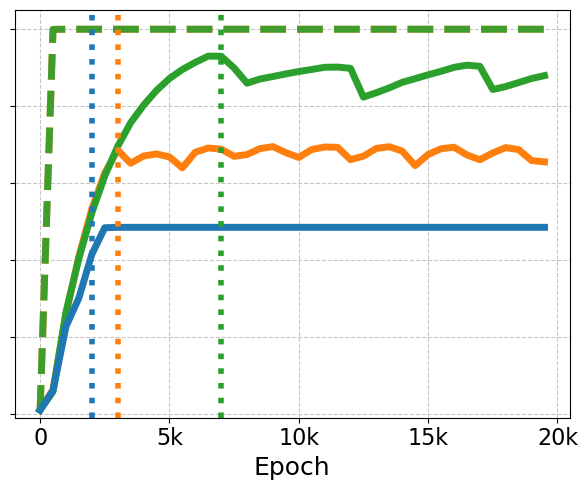

In [22]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938|softmax_precision-16",
                   "add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938",
                   "add_mod|num_epochs-20000|train_fraction-0.7|log_frequency-500|lr-0.0005|batch_size-8938|softmax_precision-64"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")


#ax.plot(epochs, experiment_results_64_stable_sum["test"]["accuracy"], linewidth=linewidth, label='Test accuracy stable sum', color=colors[2])
ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
#ax.plot(epochs, experiment_results_64_stable_sum["train"]["accuracy"], linewidth=linewidth, linestyle='--', color=colors[2])
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - stable sum\n float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]
ax.set_yticklabels([])


ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

plt.show()

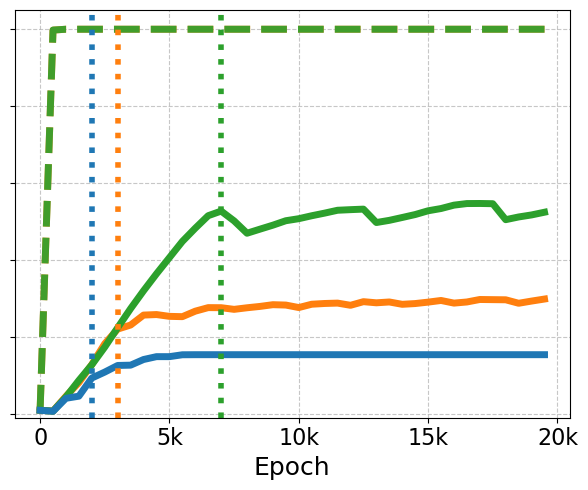

In [23]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch


from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661|softmax_precision-16",
                   "add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661",
                   "add_mod|num_epochs-20000|train_fraction-0.6|log_frequency-500|lr-0.0005|batch_size-7661|softmax_precision-64"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - stable_sum_fp64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]



ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_yticklabels([])
plt.tight_layout()  

plt.show()

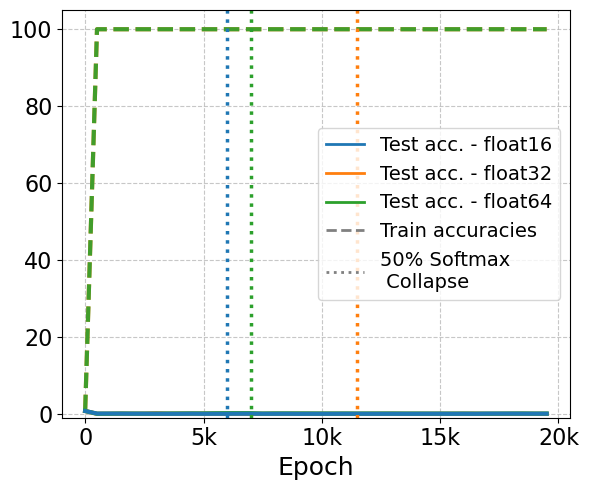

In [24]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-16|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|adam_epsilon-1e-30",
                   "add_mod|num_epochs-20000|train_fraction-0.4|log_frequency-500|lr-0.0005|batch_size-5107|softmax_precision-64|adam_epsilon-1e-30"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')

ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.4))[0][0]*log_frequency, color=colors[0], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.4))[0][0]*log_frequency, color=colors[1], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.4))[0][0]*log_frequency, color=colors[2], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax\n Collapse'),
]

ax.legend(handles=legend_elements, loc='center right', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout() 

plt.show()

## Figure 3

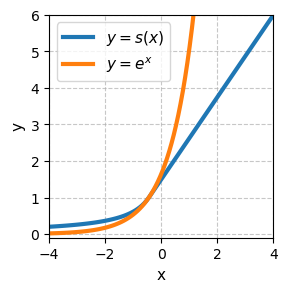

In [25]:
import matplotlib.pyplot as plt
import torch

def soften_exp(x):
    return torch.where(
        x < 0,
        1/(1-x+1e-18),
        x+1
    )

page_width_inches = 8.27
figure_width = 0.35 * page_width_inches
aspect_ratio = 1 
figure_height = figure_width / aspect_ratio

plt.figure(figsize=(figure_width, figure_height))
plt.plot(torch.linspace(-4, 4, 100), soften_exp(torch.linspace(-4, 5, 100)), linewidth=3 , label="$y=s(x)$")
plt.plot(torch.linspace(-4, 4, 100), torch.exp(torch.linspace(-4, 5, 100)), linewidth=3 , label="$y=e^x$")
plt.ylim(-0.1, 6)
plt.xlim(-4, 4)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc="upper left", fontsize=11)

plt.xlabel("x", fontsize=11)
plt.ylabel("y", fontsize=11)

## Figure 4

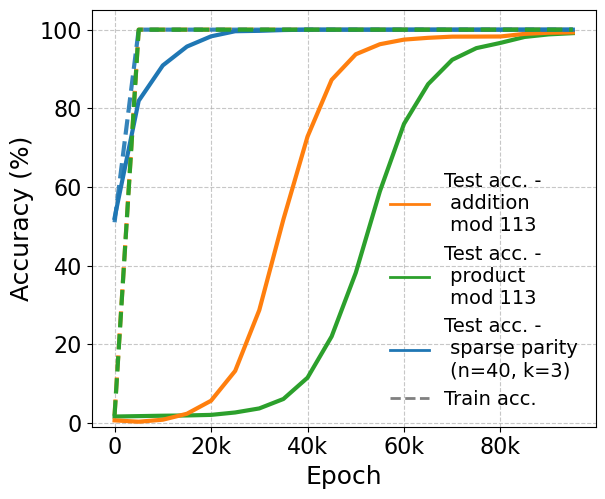

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))
    
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c']
experiment_keys = ["add_mod|num_epochs-100000|train_fraction-0.4|loss_function-stablemax|log_frequency-5000|binary_operation-product_mod|lr-0.01|batch_size-5107|beta2-0.999",
                   "add_mod|num_epochs-100000|train_fraction-0.4|loss_function-stablemax|log_frequency-5000|lr-0.01|batch_size-5107|beta2-0.999",
                   "sparse_parity|num_epochs-100000|train_fraction-0.5|loss_function-stablemax|log_frequency-5000|lr-0.01|batch_size-1000|dataset-sparse_parity|num_noise_features-40|num_parity_features-3|num_samples-2000|beta2-0.999|adam_epsilon-1e-18"]


log_frequency = 5000
add_mod_results, num_logged_epochs = read_metrics(experiment_keys[0])
product_mod_results, _  = read_metrics(experiment_keys[1])
sparse_parity_results, _ = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_add_mod = get_metric_values(add_mod_results, "train", "accuracy")*100
test_accuracy_add_mod = get_metric_values(add_mod_results, "test", "accuracy")*100

train_accuracy_product_mod = get_metric_values(product_mod_results, "train", "accuracy")*100
test_accuracy_product_mod = get_metric_values(product_mod_results, "test", "accuracy")*100

train_accuracy_sparse_parity = get_metric_values(sparse_parity_results, "train", "accuracy")*100
test_accuracy_soparse_parity = get_metric_values(sparse_parity_results, "test", "accuracy")*100



ax.plot(epochs, test_accuracy_add_mod,linewidth=linewidth, color=colors[2])

ax.plot(epochs, test_accuracy_product_mod, linewidth=linewidth, color=colors[1],)

ax.plot(epochs, train_accuracy_add_mod, linewidth=linewidth, alpha=0.9, color=colors[1],linestyle='--')

ax.plot(epochs, test_accuracy_soparse_parity ,linewidth=linewidth,  color=colors[0])
ax.plot(epochs, train_accuracy_sparse_parity,linewidth=linewidth, alpha=0.9, color=colors[0], linestyle='--')
ax.plot(epochs, train_accuracy_product_mod,linewidth=linewidth, linestyle='--', color=colors[2])



plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)


ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. -\n addition\n mod 113'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. -\n product\n mod 113'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. -\n sparse parity\n (n=40, k=3)'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train acc.'),
]
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
ax.set_xticks(epochs[::4])

ax.legend(handles=legend_elements, loc='lower right', 
             fontsize=14, framealpha=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()


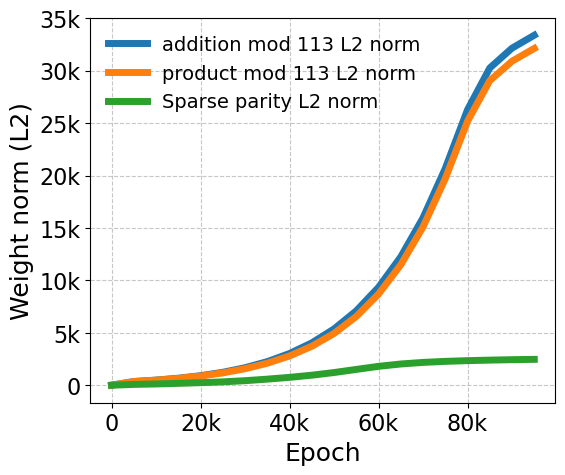

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

add_mod_norm = get_model_norm(add_mod_results)
prod_mod_norm = get_model_norm(product_mod_results)
sparse_parity_norm = get_model_norm(sparse_parity_results)


plt.plot(epochs, add_mod_norm, linewidth=5, label="addition mod 113 L2 norm")
plt.plot(epochs, prod_mod_norm, linewidth=5, label="product mod 113 L2 norm")
plt.plot(epochs , sparse_parity_norm, linewidth=5, label="Sparse parity L2 norm")
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylabel("Weight norm (L2)", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
ax.set_xticks(epochs[::4])

ax.yaxis.set_major_formatter(FuncFormatter(format_func))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, framealpha=0)

## Figure 6

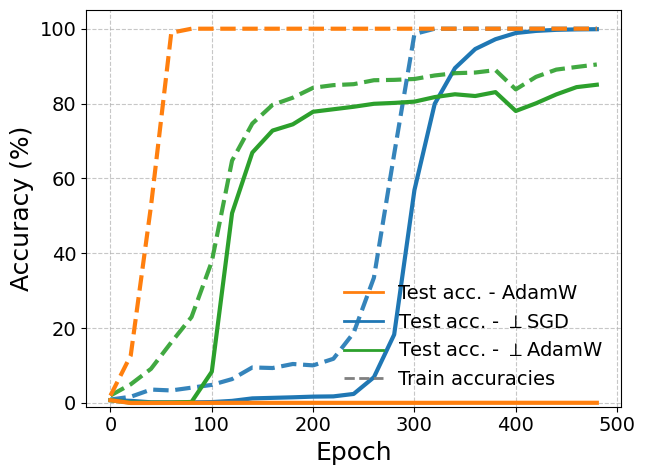

In [3]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c']#plt.get_cmap("tab10").colors
experiment_keys = ["add_mod|num_epochs-500|train_fraction-0.4|log_frequency-20|lr-0.005|batch_size-5107|orthogonal_gradients-True",
                   "add_mod|num_epochs-500|train_fraction-0.4|optimizer-SGD|loss_function-stablemax|log_frequency-20|lr-10.0|batch_size-5107|softmax_precision-64|train_precision-64|orthogonal_gradients-True",
                   "add_mod|num_epochs-500|train_fraction-0.4|log_frequency-20|lr-0.005|batch_size-5107"]


log_frequency = 20

baseline, _ = read_metrics(experiment_keys[2])
ortho_adamw, num_logged_epochs = read_metrics(experiment_keys[0])
ortho_sgd, _  = read_metrics(experiment_keys[1])
linewidth = 3

fig, ax = plt.subplots(figsize=(6.4, 4.8))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_ortho_adamw = get_metric_values(ortho_adamw, "train", "accuracy")*100
test_accuracy_ortho_adamw = get_metric_values(ortho_adamw, "test", "accuracy")*100

train_accuracy_ortho_sgd= get_metric_values(ortho_sgd, "train", "accuracy")*100
test_accuracy_ortho_sgd = get_metric_values(ortho_sgd, "test", "accuracy")*100

train_accuracy_baseline = get_metric_values(baseline, "train", "accuracy")*100
test_accuracy_basline = get_metric_values(baseline, "test", "accuracy")*100


plt.plot(epochs, test_accuracy_ortho_sgd, linewidth=linewidth, color=colors[0])

plt.plot(epochs, train_accuracy_ortho_sgd, linewidth=linewidth, alpha=0.9, color=colors[0],linestyle='--')

plt.plot(epochs, test_accuracy_ortho_adamw,linewidth=linewidth, color=colors[2])



plt.plot(epochs, test_accuracy_basline,linewidth=linewidth,  color=colors[1])
plt.plot(epochs, train_accuracy_ortho_adamw,linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
plt.plot(epochs, train_accuracy_baseline,linewidth=linewidth, linestyle='--', color=colors[1])



plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=18)


plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - AdamW'),
    Line2D([0], [0], color=colors[0], lw=2, label=r'Test acc. - $\perp$SGD'),
    Line2D([0], [0], color=colors[2], lw=2, label=r'Test acc. - $\perp$AdamW'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
]


plt.legend(handles=legend_elements, loc='lower right', 
             fontsize=14, framealpha=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('figure_6b_repro.png')
plt.show()


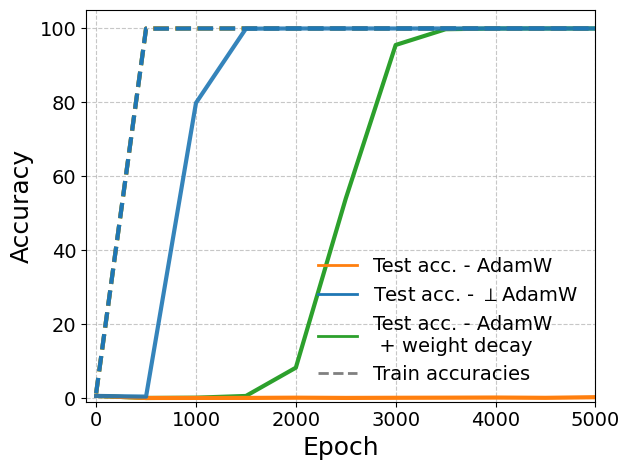

In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c']
experiment_keys = ["add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|lr-0.001|batch_size-5017|orthogonal_gradients-True|use_transformer-True",
                   "add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|lr-0.001|batch_size-5017|weight_decay-1.5|use_transformer-True",
                   "add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|lr-0.001|batch_size-5017|use_transformer-True"]


log_frequency = 500

weight_decay, _ = read_metrics(experiment_keys[1])
base_adamw, num_logged_epochs = read_metrics(experiment_keys[0])
ortho_adamw, _  = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6.4, 4.8))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_ortho_adamw = get_metric_values(base_adamw, "train", "accuracy")*100
test_accuracy_ortho_adamw = get_metric_values(base_adamw, "test", "accuracy")*100

train_accuracy_ortho_sgd= get_metric_values(ortho_adamw, "train", "accuracy")*100
test_accuracy_ortho_sgd = get_metric_values(ortho_adamw, "test", "accuracy")*100

train_accuracy_baseline = get_metric_values(weight_decay, "train", "accuracy")*100
test_accuracy_basline = get_metric_values(weight_decay, "test", "accuracy")*100


plt.plot(epochs, train_accuracy_baseline, linestyle='--',linewidth=3, color=colors[2])

plt.plot(epochs, test_accuracy_basline, linewidth=3, color=colors[2])

plt.plot(epochs, train_accuracy_ortho_sgd, linewidth=3, alpha=0.9, color=colors[1],linestyle='--')

plt.plot(epochs, test_accuracy_ortho_sgd,linewidth=3,  color=colors[1])

plt.plot(epochs, train_accuracy_ortho_adamw,linewidth=3, linestyle='--', color=colors[0])

plt.plot(epochs, test_accuracy_ortho_adamw,linewidth=3, alpha=0.9, color=colors[0])


plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)


plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - AdamW'),
    Line2D([0], [0], color=colors[0], lw=2, label=r'Test acc. - $\perp$AdamW'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - AdamW \n + weight decay'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),

]

plt.legend(handles=legend_elements, loc='lower right', 
             fontsize=14, framealpha=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-100, 5000)
plt.tight_layout()
plt.show()



## Figure 6a (sub_mod)

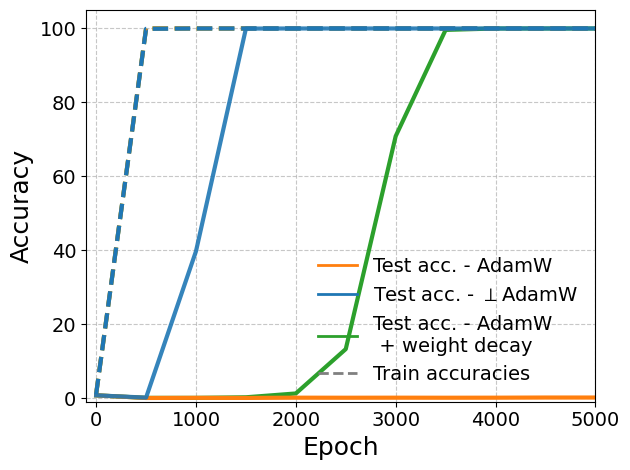

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c']

# The dataset still defaults to "add_mod" even when we change the binary_operation!
experiment_keys = ["add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|binary_operation-subtract_mod|lr-0.001|batch_size-5017|orthogonal_gradients-True|use_transformer-True",
                   "add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|binary_operation-subtract_mod|lr-0.001|batch_size-5017|weight_decay-1.5|use_transformer-True",
                   "add_mod|num_epochs-5000|train_fraction-0.4|log_frequency-200|binary_operation-subtract_mod|lr-0.001|batch_size-5017|use_transformer-True"]


log_frequency = 500

weight_decay, _ = read_metrics(experiment_keys[1])
base_adamw, num_logged_epochs = read_metrics(experiment_keys[0])
ortho_adamw, _  = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6.4, 4.8))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_ortho_adamw = get_metric_values(base_adamw, "train", "accuracy")*100
test_accuracy_ortho_adamw = get_metric_values(base_adamw, "test", "accuracy")*100

train_accuracy_ortho_sgd= get_metric_values(ortho_adamw, "train", "accuracy")*100
test_accuracy_ortho_sgd = get_metric_values(ortho_adamw, "test", "accuracy")*100

train_accuracy_baseline = get_metric_values(weight_decay, "train", "accuracy")*100
test_accuracy_basline = get_metric_values(weight_decay, "test", "accuracy")*100


plt.plot(epochs, train_accuracy_baseline, linestyle='--',linewidth=3, color=colors[2])

plt.plot(epochs, test_accuracy_basline, linewidth=3, color=colors[2])

plt.plot(epochs, train_accuracy_ortho_sgd, linewidth=3, alpha=0.9, color=colors[1],linestyle='--')

plt.plot(epochs, test_accuracy_ortho_sgd,linewidth=3,  color=colors[1])

plt.plot(epochs, train_accuracy_ortho_adamw,linewidth=3, linestyle='--', color=colors[0])

plt.plot(epochs, test_accuracy_ortho_adamw,linewidth=3, alpha=0.9, color=colors[0])


plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)


plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - AdamW'),
    Line2D([0], [0], color=colors[0], lw=2, label=r'Test acc. - $\perp$AdamW'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - AdamW \n + weight decay'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),

]

plt.legend(handles=legend_elements, loc='lower right', 
             fontsize=14, framealpha=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-100, 5000)
plt.tight_layout()
plt.savefig('figure_6a_sub_mod.png')
plt.show()



## Appendix

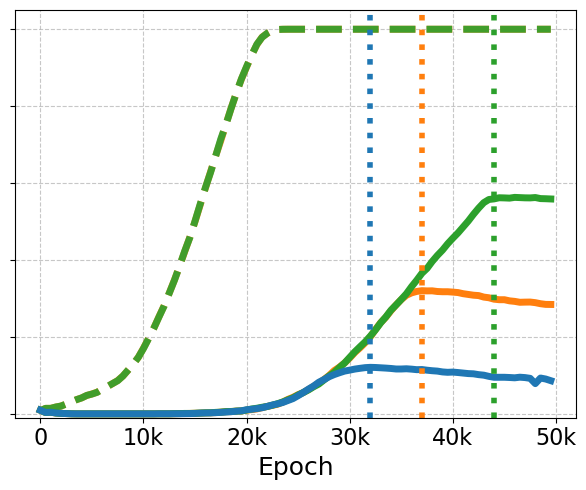

In [27]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch


from matplotlib.ticker import FuncFormatter

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-10000|train_fraction-0.6|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-7661|softmax_precision-16|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.6|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-7661|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.6|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-7661|softmax_precision-64|use_scheduler-True"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)


legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]



ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

ax.set_yticklabels([])
plt.tight_layout()  

plt.savefig('float32vsfloat64_60_percent_lr_sch.pdf')

plt.show()

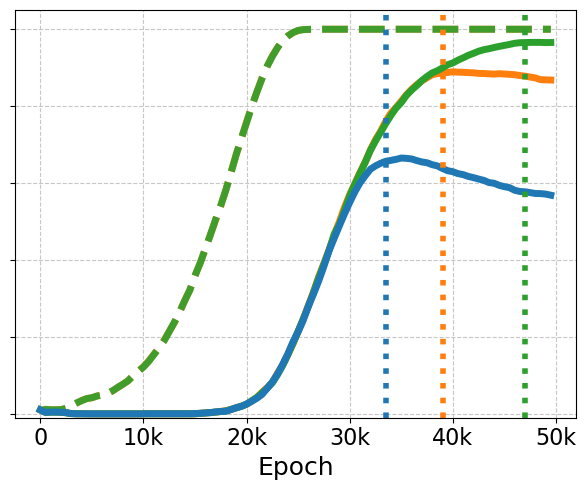

In [26]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-10000|train_fraction-0.7|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-8938|softmax_precision-16|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.7|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-8938|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.7|optimizer-SGD|log_frequency-100|lr-4.0|batch_size-8938|softmax_precision-64|use_scheduler-True"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 5

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")


#ax.plot(epochs, experiment_results_64_stable_sum["test"]["accuracy"], linewidth=linewidth, label='Test accuracy stable sum', color=colors[2])
ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')
#ax.plot(epochs, experiment_results_64_stable_sum["train"]["accuracy"], linewidth=linewidth, linestyle='--', color=colors[2])
ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.5))[0][0]*log_frequency, color=colors[1], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.5))[0][0]*log_frequency, color=colors[2], linewidth=4, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.5))[0][0]*log_frequency, color=colors[0], linewidth=4, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[3], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - stable sum\n float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax Collapse'),
]
ax.set_yticklabels([])


ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()

plt.savefig('float32vsfloat64_70_percent_lr_sch.pdf')


plt.show()

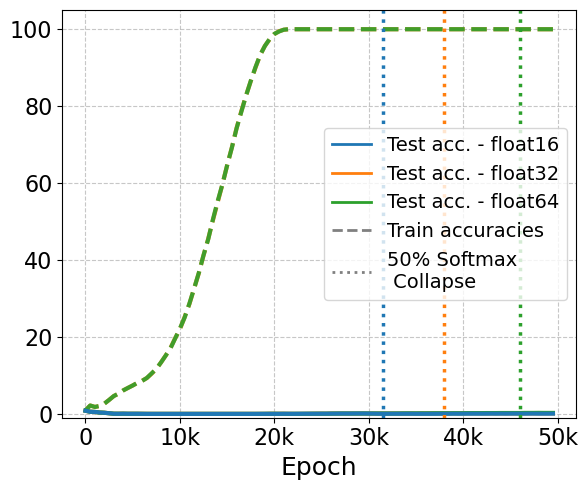

In [25]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-10000|train_fraction-0.4|optimizer-SGD|log_frequency-100|lr-3.0|batch_size-5107|softmax_precision-16|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.4|optimizer-SGD|log_frequency-100|lr-3.0|batch_size-5107|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.4|optimizer-SGD|log_frequency-100|lr-3.0|batch_size-5107|softmax_precision-64|use_scheduler-True"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
experiment_results_64, _ = read_metrics(experiment_keys[2])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')
ax.plot(epochs, test_accuracy_64, linewidth=linewidth, color=colors[2], label='Test accuracy float64')
ax.plot(epochs, train_accuracy_64, linewidth=linewidth, alpha=0.9, color=colors[2], linestyle='--')

ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.4))[0][0]*log_frequency, color=colors[0], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_32>0.4))[0][0]*log_frequency, color=colors[1], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")
ax.axvline(torch.where(torch.tensor(softmax_collapse_64>0.4))[0][0]*log_frequency, color=colors[2], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")

ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float16'),
    Line2D([0], [0], color=colors[1], lw=2, label='Test acc. - float32'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax\n Collapse'),
]

ax.legend(handles=legend_elements, loc='center right', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout() 
plt.savefig('float32vsfloat64_40_percent_lr_sch.pdf')


plt.show()

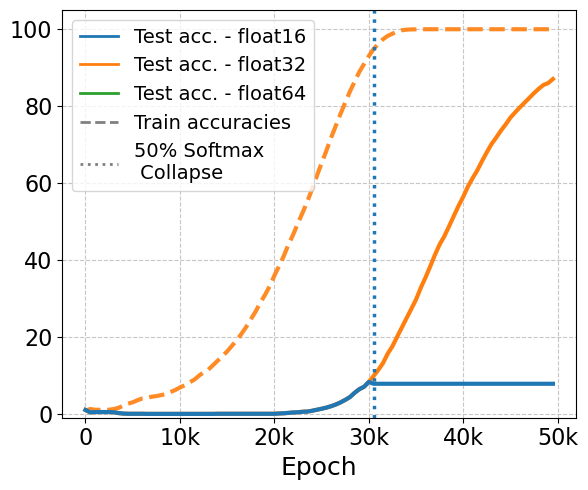

In [36]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import torch
from matplotlib.ticker import FuncFormatter
import torch

def format_func(value, tick_number):
    if value == 0:
        return "0"
    elif value >= 1000:
        return f"{int(value/1000)}k"
    else:
        return str(int(value))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

experiment_keys = ["add_mod|num_epochs-10000|train_fraction-0.7|optimizer-SGD|log_frequency-100|lr-3.0|batch_size-8938|softmax_precision-64|asc-True|use_scheduler-True",
                   "add_mod|num_epochs-10000|train_fraction-0.7|optimizer-SGD|log_frequency-100|lr-3.0|batch_size-8938|softmax_precision-64|use_scheduler-True"]


log_frequency = 500




train_fraction = 0.6
experiment_results_16, num_logged_epochs = read_metrics(experiment_keys[0])
experiment_results_32, _  = read_metrics(experiment_keys[1])
linewidth = 3

fig, ax = plt.subplots(figsize=(6, 5))
epochs = range(0, log_frequency * (num_logged_epochs), log_frequency)


train_accuracy_16 = get_metric_values(experiment_results_16, "train", "accuracy")*100
test_accuracy_16 = get_metric_values(experiment_results_16, "test", "accuracy")*100
softmax_collapse_16 = get_metric_values(experiment_results_16, "train", "softmax_collapse")

train_accuracy_32 = get_metric_values(experiment_results_32, "train", "accuracy")*100
test_accuracy_32 = get_metric_values(experiment_results_32, "test", "accuracy")*100
softmax_collapse_32 = get_metric_values(experiment_results_32, "train", "softmax_collapse")

train_accuracy_64 = get_metric_values(experiment_results_64, "train", "accuracy")*100
test_accuracy_64 = get_metric_values(experiment_results_64, "test", "accuracy")*100
softmax_collapse_64 = get_metric_values(experiment_results_64, "train", "softmax_collapse")



ax.plot(epochs, test_accuracy_32, linewidth=linewidth, color=colors[1], label='Test accuracy float32')
ax.plot(epochs, train_accuracy_32, linewidth=linewidth, alpha=0.9, color=colors[1], linestyle='--')

ax.plot(epochs, test_accuracy_16, linewidth=linewidth, color=colors[0], label='Test accuracy float16')

ax.set_xlabel('Epoch', fontsize=18)


ax.axvline(torch.where(torch.tensor(softmax_collapse_16>0.4))[0][0]*log_frequency, color=colors[0], linewidth=2.5, linestyle=':', label="50% zero terms in the loss")


ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylim(-1, 105)

legend_elements = [
    Line2D([0], [0], color=colors[0], lw=2, label='Test acc. - float64 \n with artifically induced SC'),
    Line2D([0], [0], color=colors[2], lw=2, label='Test acc. - float64'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='Train accuracies'),
    Line2D([0], [0], color='gray', lw=2, linestyle=':', label='50% Softmax\n Collapse'),
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout() 
plt.savefig('float32vsfloat64_40_percent_lr_sch.pdf')


plt.show()